# Homework 5

In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rn
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from random import randrange
import warnings

warnings.filterwarnings("ignore")

# set random seed
def reset_random_seeds():
    np.random.seed(123)
    rn.seed(123)
    tf.random.set_seed(1234)

## Problem 1

### (a)

In [3]:
# create series
series = read_csv('CarSales.csv',header=0, index_col=0, squeeze=True, parse_dates=True)

### (b)

In [4]:
# print first 10 rows of series
series.head(10)

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
1960-06-01    13791
1960-07-01     9498
1960-08-01     8251
1960-09-01     7049
1960-10-01     9545
Name: Sales, dtype: int64

### (c)

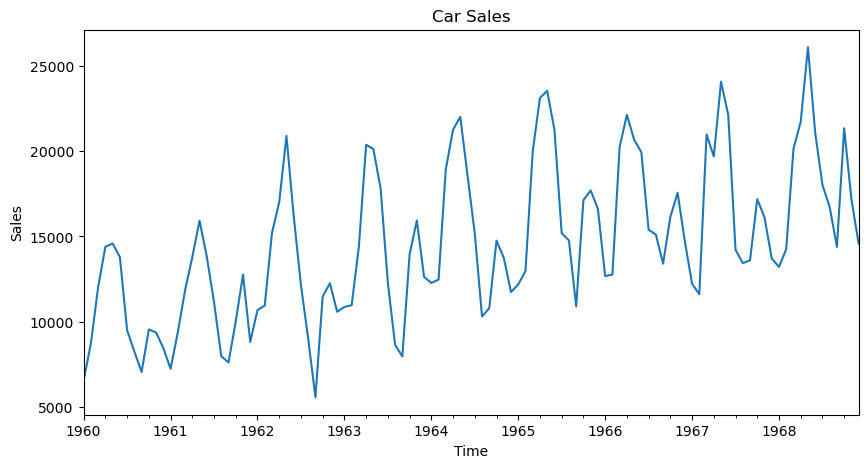

In [5]:
# plot series
series.plot(kind='line', figsize=(10,5))
plt.title('Car Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

### (d)

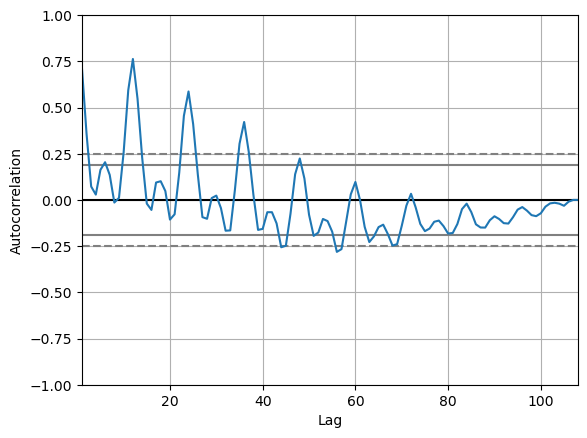

In [6]:
# pandas autocorrelation plot
autocorrelation_plot(series)
plt.show()

### (e)

In [7]:
# Dickerson-Fuller test
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.223813
p-value: 0.663269
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583


> Between our graphs and our p-value of 0.66 we cannot reject the null hypothesis and our data is non-stationary.

### (f)

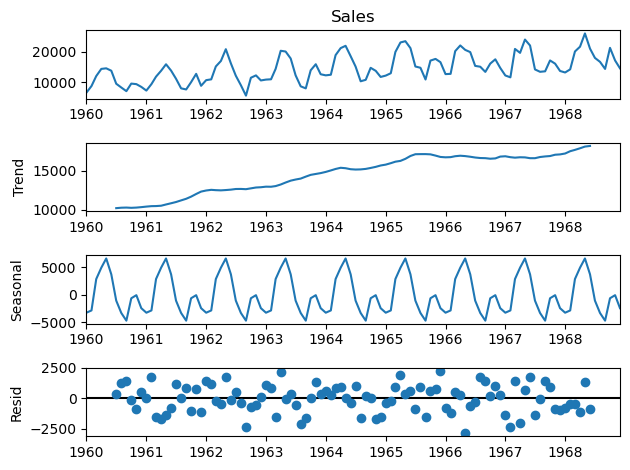

In [8]:
# Seasonal Decomposition
seasonal_decompose(series, model='additive').plot()
plt.show()

> From the plot above we can clearly see an increasing trend and seasonal nature in the data.

### (g) WORK IN PROGRESS

In [9]:
# Detrending
model = LinearRegression()

### (h)

In [10]:
# Creating train and test sets
data = series.values
trainSize = int(len(data)*0.7)
train, test = data[0:trainSize], data[trainSize:]

# Forcasting
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('\nTest RMSE: %.3f' % rmse)

predicted=23376.408419, expected=22135.000000
predicted=23484.114698, expected=20677.000000
predicted=16546.381239, expected=19933.000000
predicted=18104.352159, expected=15388.000000
predicted=16005.534771, expected=15113.000000
predicted=15729.286994, expected=13401.000000
predicted=14730.817679, expected=16135.000000
predicted=17479.662360, expected=17562.000000
predicted=17853.671131, expected=14720.000000
predicted=13673.838112, expected=12225.000000
predicted=10411.509585, expected=11608.000000
predicted=12886.212772, expected=20985.000000
predicted=24208.893882, expected=19692.000000
predicted=19514.556472, expected=24081.000000
predicted=20414.500505, expected=22114.000000
predicted=20977.864223, expected=14220.000000
predicted=12670.934120, expected=13434.000000
predicted=13107.603927, expected=13598.000000
predicted=17713.991824, expected=17187.000000
predicted=19017.428553, expected=16119.000000
predicted=15963.486661, expected=13713.000000
predicted=12322.644196, expected=1

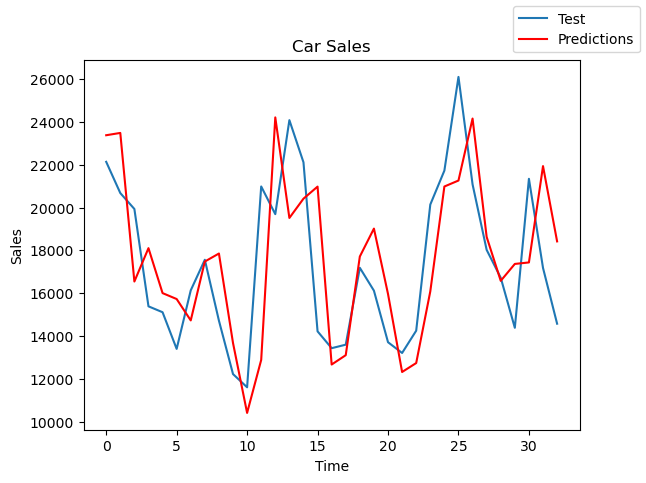

In [11]:
# Plotting
plt.plot(test)
plt.plot(predictions, color='red')
plt.figlegend(['Test', 'Predictions'])
plt.title('Car Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

## Problem 2

In [12]:
reset_random_seeds()

### (a)